The following code chunks will be dealing with vizualizing Dice score for the polar and cartesian. From mapping out their frequency to seeing how they would relate with the loss value.



1. Regular histogram of test dice (P), (C): dice v.s. count: [Done with the modification of just having a histogram with the differnet rounds of dice score. Does not differentiate for P and C.]
2. Loss versus in group dice performance [Done]


4.  Scatter plot + sideway axial histogram:
  - (dice difference with previous work, in group dice in last round) [Done]






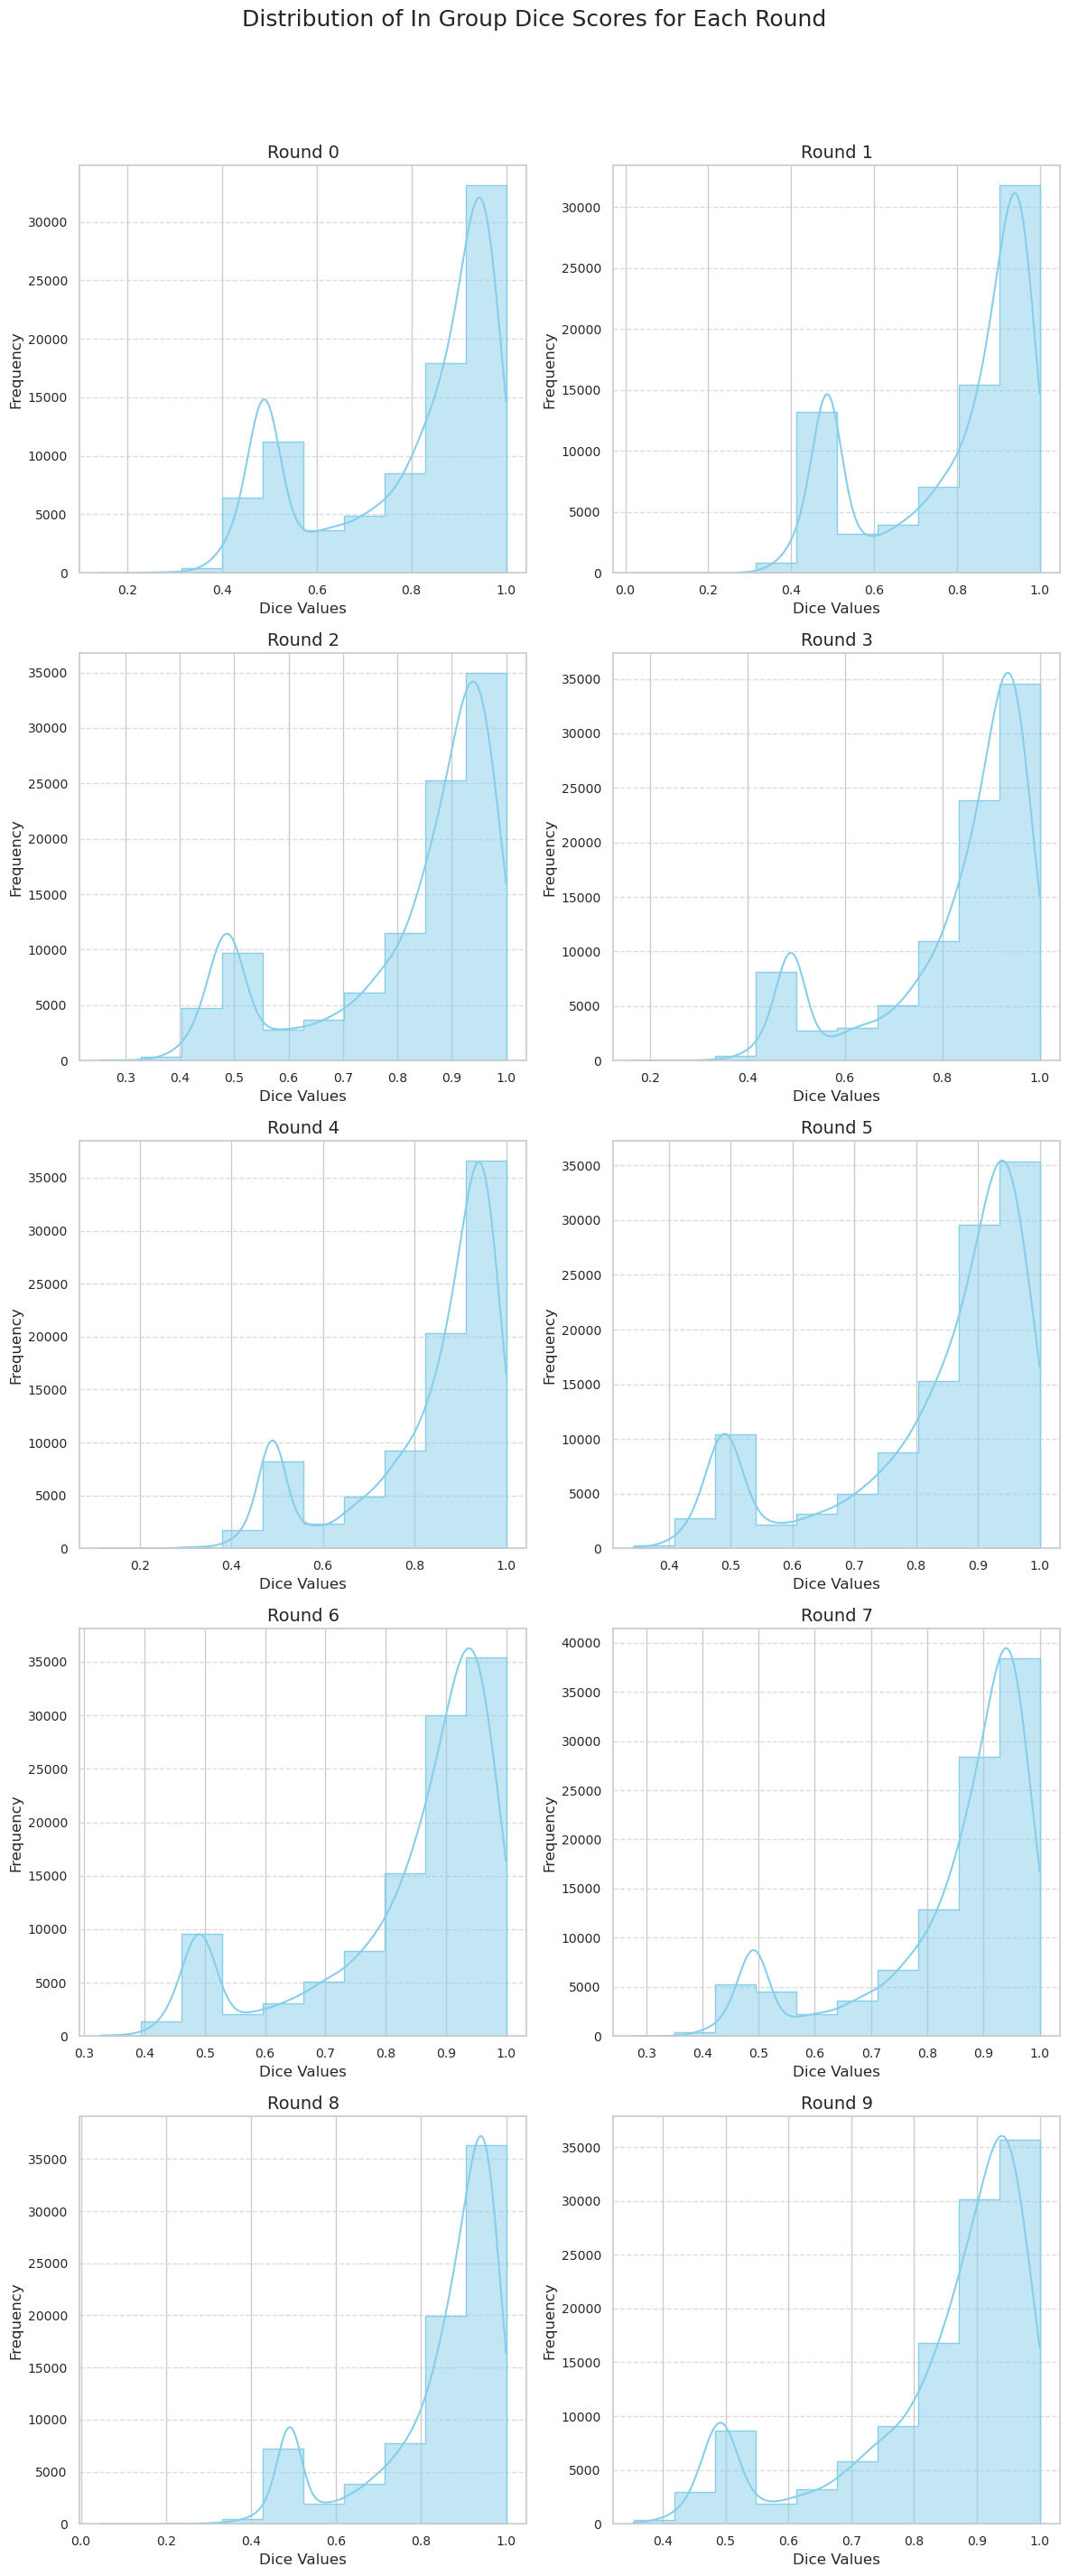

In [1]:
##################################### 1. HISTOGRAM ##############################################
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def find_inGroup(matrix):
    picked_scores = []
    for row in matrix:
        subarray1, subarray2 = np.split(row, 2)
        if np.count_nonzero(subarray1) == 1:
            picked_value = subarray1[subarray1 != 0][0]
        else:
            picked_value = subarray2[subarray2 != 0][0]
        picked_scores.append(picked_value)

    return picked_scores

def plot_histograms(rounds, score_folder):
    # Set Seaborn style and color palette
    sns.set(style="whitegrid", palette="pastel")

    # Define the number of rows and columns for subplots
    rows = (rounds + 1) // 2  # Ensure an even number of rows
    cols = 2

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
    fig.suptitle("Distribution of In Group Dice Scores for Each Round", fontsize=18)

    for round_folder in range(rounds):
        score_matrix = np.load(f'{score_folder}/scorematrix_round_{round_folder}.npy')
        in_group_scores = find_inGroup(score_matrix)

        # Create a Seaborn histogram on the current subplot
        ax = axes[round_folder // cols, round_folder % cols]
        sns.histplot(in_group_scores, bins=10, kde=True, color='skyblue', element="step", stat="frequency", ax=ax)

        # Set plot labels and title for each subplot
        ax.set_xlabel("Dice Values", fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.set_title(f"Round {round_folder}", fontsize=14)

        # Set font sizes for ticks
        ax.tick_params(axis='both', which='major', labelsize=10)

        # Add grid lines
        ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Show the plot
    plt.show()

#Add the location to the score martix, for instance:
#score_matrix_folder = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix'
score_matrix_folder = '/home/scram-2004/Project/Our-UNet-Code/history_results/results-dynamic-max/scorematrix'
plot_histograms(10, score_matrix_folder)


Round 0:
Min Loss (Cartesian): [0.15547602 0.15590918 0.1505076  0.16634619 0.70859647]
Min Loss (Polar): [0.18500961 0.17753485 0.17940691 0.51369238 0.18134101]
In-Group Dice Scores: [0.8096407535374698, 0.9344121028985084, 0.7171353830661853, 0.5498530185482885, 0.5027117484719432, 0.8170403133544364, 0.4909878592720518, 0.5875315879919674, 0.6793190381933919, 0.5339723548293093, 0.7210683565171817, 0.6094446533663862, 0.6070045652798841, 0.9219968372210097, 0.4932127894480617, 0.45715227818155707, 0.8745136210048435, 0.8675247091537541, 0.4102172207540911, 0.620902729891762, 0.8995787211049291, 0.9370478055562529, 0.9407940379624107, 0.9360387324344759, 0.7133964990855972, 0.8377896663744854, 0.921605921952644, 0.9389131420605861, 0.8654499739436534, 1.0, 0.862918141989419, 0.6828803564890871, 0.854366235967842, 0.7350422282441953, 0.7878295255511535, 0.8216836546234876, 0.8858789791749444, 0.8216228204036781, 0.8639450427276535, 0.8858733293568086, 0.9266806293081215, 0.9147538662

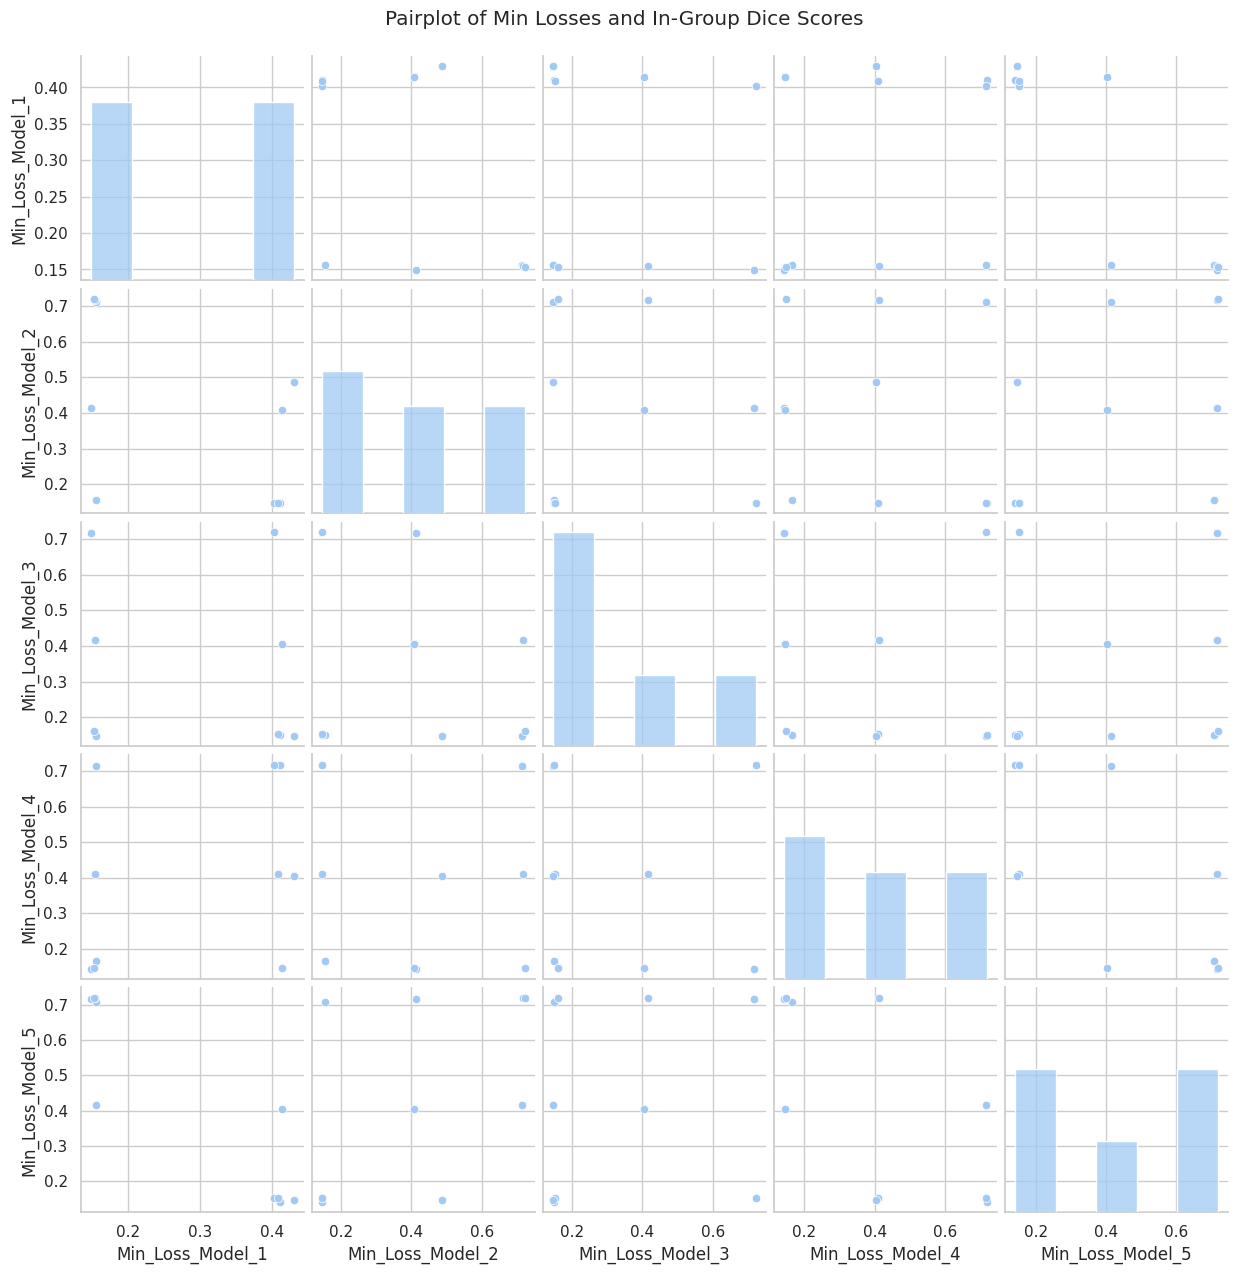

In [2]:
######## 2. Loss versus in group dice performance ############
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def find_loss_and_dice(model_history_folder, score_matrix_folder, rounds):
    # Initialize lists to store minimum loss values and in-group dice scores for each round and type
    results = []



    for round_folder in range(rounds):
        # Load Cartesian and Polar history files
        cartesian_history = np.load(f'{model_history_folder}/round_{round_folder}/carte_history.npy')
        polar_history = np.load(f'{model_history_folder}/round_{round_folder}/polar_history.npy')

        # Extract corresponding minimum loss values
        min_loss_value_cartesian = np.min(cartesian_history, axis=1)
        min_loss_value_polar = np.min(polar_history, axis=1)

        # In-Group Dice Scores
        score_matrix = np.load(f'{score_matrix_folder}/scorematrix_round_{round_folder}.npy')
        in_group_scores = find_inGroup(score_matrix)

        # Store minimum loss values and in-group dice scores for each round
        for i in range(len(min_loss_value_cartesian)):
            results.append({
                'round': round_folder,
                'min_loss_cartesian': min_loss_value_cartesian[i],
                'min_loss_polar': min_loss_value_polar[i],
                'in_group_dice_scores': in_group_scores[i]
            })

        # Print information for each round
        print(f"Round {round_folder}:")
        print(f"Min Loss (Cartesian): {min_loss_value_cartesian}")
        print(f"Min Loss (Polar): {min_loss_value_polar}")
        print(f"In-Group Dice Scores: {in_group_scores}")
        print("\n")

    # Return the collected data
    return results

## Adding the location of the model history and the score matrix , for instance:
model_history_folder = '/content/drive/MyDrive/UNetFolder/results20231113/models_history'
score_matrix_folder = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix'

min_loss_values = []
# Aggregate Min Loss Data
for round_folder in range(10):
    model_history_file = os.path.join(model_history_folder, f'round_{round_folder}/carte_history.npy')
    model_history = np.load(model_history_file)
    min_loss_per_model = [np.min(model) for model in model_history]
    min_loss_values.append(min_loss_per_model)

# Aggregate Dice Data
in_group_dice_scores = find_loss_and_dice(model_history_folder, score_matrix_folder, 10)

# Create a DataFrame
min_loss_df = pd.DataFrame(min_loss_values, columns=[f'Min_Loss_Model_{i}' for i in range(1, 6)])
df = pd.concat([min_loss_df, pd.Series(in_group_dice_scores, name='In_Group_Dice')], axis=1)

# Visualize Correlation
sns.pairplot(df)
plt.suptitle('Pairplot of Min Losses and In-Group Dice Scores', y=1.02)
plt.show()


Round 0:
Min Loss (Cartesian): [0.15547602 0.15590918 0.1505076  0.16634619 0.70859647]
Min Loss (Polar): [0.18500961 0.17753485 0.17940691 0.51369238 0.18134101]
In-Group Dice Scores: [0.8096407535374698, 0.9344121028985084, 0.7171353830661853, 0.5498530185482885, 0.5027117484719432, 0.8170403133544364, 0.4909878592720518, 0.5875315879919674, 0.6793190381933919, 0.5339723548293093, 0.7210683565171817, 0.6094446533663862, 0.6070045652798841, 0.9219968372210097, 0.4932127894480617, 0.45715227818155707, 0.8745136210048435, 0.8675247091537541, 0.4102172207540911, 0.620902729891762, 0.8995787211049291, 0.9370478055562529, 0.9407940379624107, 0.9360387324344759, 0.7133964990855972, 0.8377896663744854, 0.921605921952644, 0.9389131420605861, 0.8654499739436534, 1.0, 0.862918141989419, 0.6828803564890871, 0.854366235967842, 0.7350422282441953, 0.7878295255511535, 0.8216836546234876, 0.8858789791749444, 0.8216228204036781, 0.8639450427276535, 0.8858733293568086, 0.9266806293081215, 0.9147538662

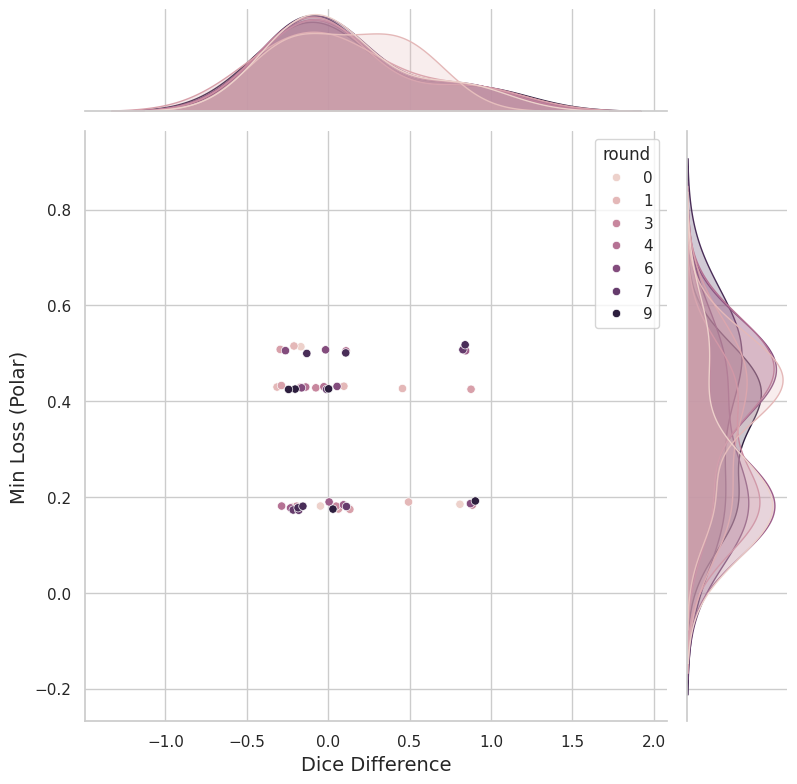

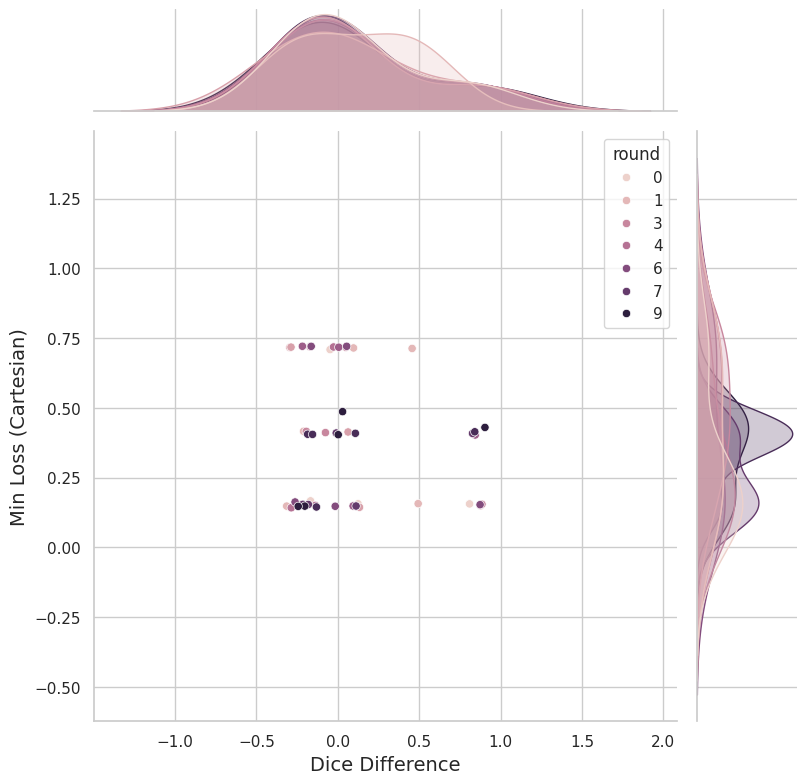

In [3]:
#########  3. Scatter plot + sideway axial histogram with the dice score difference #############
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
Function for getting the In-group Score for the Dice values [From Rasha]
'''
def find_inGroup(matrix):
    picked_scores = []
    for row in matrix:
        # Split the row into two subarrays
        subarray1, subarray2 = np.split(row, 2)
        # Determine which subarray contains the zeros and get the in-group score
        if np.count_nonzero(subarray1) == 1:
            picked_value = subarray1[subarray1 != 0][0]  # Get the non-zero value
        else:
            picked_value = subarray2[subarray2 != 0][0]  # Get the non-zero value
        picked_scores.append(picked_value)

    return picked_scores


def find_loss_and_dice(model_history_folder, score_matrix_folder, rounds):
    # Initialize lists to store minimum loss values and in-group dice scores for each round and type
    results = []

    for round_folder in range(rounds):
        # Load Cartesian and Polar history files
        cartesian_history = np.load(f'{model_history_folder}/round_{round_folder}/carte_history.npy')
        polar_history = np.load(f'{model_history_folder}/round_{round_folder}/polar_history.npy')

        # Extract corresponding minimum loss values
        min_loss_value_cartesian = np.min(cartesian_history, axis=1)
        min_loss_value_polar = np.min(polar_history, axis=1)

        # In-Group Dice Scores
        score_matrix = np.load(f'{score_matrix_folder}/scorematrix_round_{round_folder}.npy')
        in_group_scores = find_inGroup(score_matrix)

        # Calculate the difference between current and previous round's in-group dice scores
        dice_difference = np.diff(in_group_scores, prepend=0)

        # Store minimum loss values, in-group dice scores, and dice difference for each round
        for i in range(len(min_loss_value_cartesian)):
            results.append({
                'round': round_folder,
                'min_loss_cartesian': min_loss_value_cartesian[i],
                'min_loss_polar': min_loss_value_polar[i],
                'in_group_dice_scores': in_group_scores[i],
                'dice_difference': dice_difference[i]
            })

        # Print information for each round
        print(f"Round {round_folder}:")
        print(f"Min Loss (Cartesian): {min_loss_value_cartesian}")
        print(f"Min Loss (Polar): {min_loss_value_polar}")
        print(f"In-Group Dice Scores: {in_group_scores}")
        print(f"Dice Difference: {dice_difference}")
        print("\n")

    # Return the collected data
    return results

## Adding the location of the model history and the score matrix , for instance:
model_history_folder = '/content/drive/MyDrive/UNetFolder/results20231113/models_history'
score_matrix_folder = '/content/drive/MyDrive/UNetFolder/results20231113/scorematrix'
results_data = find_loss_and_dice(model_history_folder, score_matrix_folder, 10)

# Create a DataFrame from the results_data
import pandas as pd
df = pd.DataFrame(results_data)

# Seaborn jointplot
sns.set(style="whitegrid", palette="muted")
g = sns.jointplot(data=df, x="dice_difference", y="min_loss_polar", hue="round", kind="scatter", height=8)
g.set_axis_labels("Dice Difference", "Min Loss (Polar)", fontsize=14)

# Seaborn jointplot
n = sns.jointplot(data=df, x="dice_difference", y="min_loss_cartesian", hue="round", kind="scatter", height=8)
n.set_axis_labels("Dice Difference", "Min Loss (Cartesian)", fontsize=14)
plt.show()
